In [47]:
import os
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet

In [39]:
data_directory = "./data/CEBS/m001"
sampling_rate = '1S'
target_snr_db = 3

In [25]:
def load_dataset(directory):
    record = wfdb.rdsamp(directory)
    data = record[0]
    metadata = record[1]

    frequency = metadata['fs']
    column_names = metadata['sig_name']
    length = metadata['sig_len']

    data = pd.DataFrame(data, columns=column_names)

    frequency_string = str(int(1/frequency*1000000)) + 'U'
    index = pd.date_range(start='1/1/1970', periods=length, freq=frequency_string)
    data.set_index(index, inplace=True)
    data.drop(['I', 'II', 'RESP'], axis=1, inplace=True)
    
    return data

In [37]:
def add_gaussian(data, target_snr_db):
    data_watts = data ** 2
    data_avg_watts = np.mean(data_watts)
    data_avg_db = 10 * np.log10(data_avg_watts)

    noise_avg_db = data_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)

    mean_noise = 0
    noise = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(data_watts))

    data_noisy = data + noise
    return data_noisy

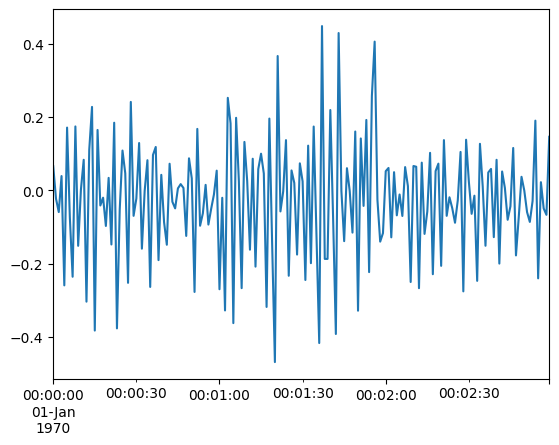

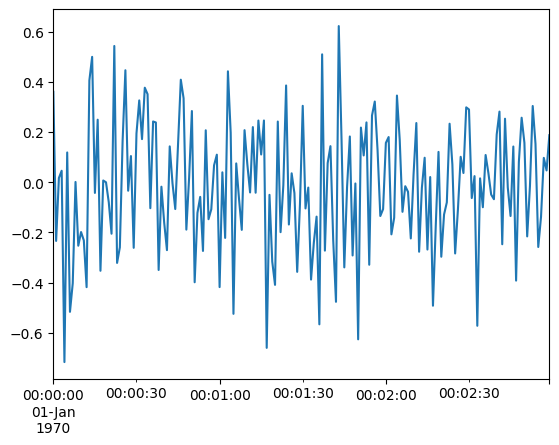

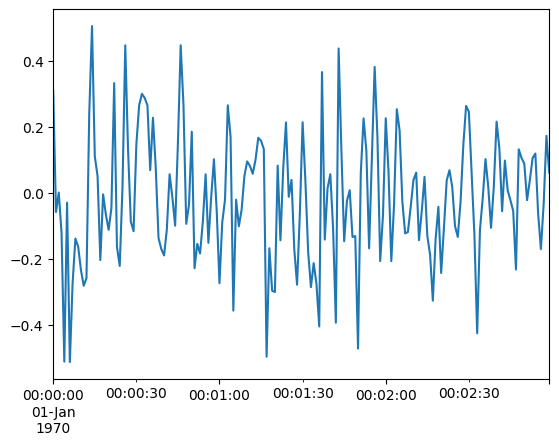

In [69]:
data = load_dataset(data_directory)
data = data.resample(sampling_rate).mean().SCG

data_noisy = add_gaussian(data, target_snr_db)

data = pd.DataFrame({'clean': data, 'gaussian': data_noisy})
data.gaussian.values
denoised = denoise_wavelet(data.gaussian, method='BayesShrink', mode='soft', wavelet_levels=1, wavelet='sym8', rescale_sigma='True')
data['denoised'] = denoised

data.clean[:180].plot()
plt.show()
data.gaussian[:180].plot()
plt.show()
data.denoised[:180].plot()
plt.show()